In [1]:
import torch
import torch.nn as nn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# make the origianal data
series = np.sin((0.1*np.arange(400))**2)

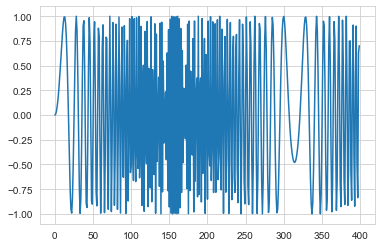

In [4]:
# plot it
plt.plot(series)

In [5]:
# Build the dataset
# T is used as past value to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    
X = np.array(X).reshape(-1, T) # make it N x T
Y = np.array(Y).reshape(-1, D)
N = len(X)
print('X.shape:', X.shape, ' Y.shape:', Y.shape)

X.shape: (390, 10)  Y.shape: (390, 1)


In [6]:
# try AR linear model
model = nn.Linear(T, 1)

In [7]:
# Loss adn optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

In [8]:
# Make inputs and targets
X_train = torch.from_numpy(X[:-N//2].astype(np.float32))
y_train = torch.from_numpy(X[:-N//2].astype(np.float32))
X_test = torch.from_numpy(X[-N//2:].astype(np.float32))
y_test = torch.from_numpy(X[-N//2:].astype(np.float32))

In [9]:
# Training
def full_grad(model, criterion, optimizer, X_train, y_train, X_test, y_test, epochs=200):
    
    # Stuff to store
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)
    
    for i in range(epochs):
        optimizer.zero_grad()
        
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        
        loss.backward()
        optimizer.step()
        
        train_losses[i] = loss.item()
        
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        test_losses[i] = test_loss.item()
        
        if (i+1) % 5 == 0:
            print(f'Epoch {i+1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')
            
    return train_losses, test_losses

In [10]:
train_losses, test_losses = full_grad(model, criterion, optimizer, X_train, y_train, X_test, y_test)

C:\Users\Computer Store\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([195, 10])) that is different to the input size (torch.Size([195, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 5/200, Train Loss: 0.5276, Test Loss: 0.4743
Epoch 10/200, Train Loss: 0.5214, Test Loss: 0.4442
Epoch 15/200, Train Loss: 0.5140, Test Loss: 0.4441
Epoch 20/200, Train Loss: 0.5013, Test Loss: 0.4283
Epoch 25/200, Train Loss: 0.5033, Test Loss: 0.4290
Epoch 30/200, Train Loss: 0.4976, Test Loss: 0.4253
Epoch 35/200, Train Loss: 0.4976, Test Loss: 0.4238
Epoch 40/200, Train Loss: 0.4969, Test Loss: 0.4236
Epoch 45/200, Train Loss: 0.4959, Test Loss: 0.4224
Epoch 50/200, Train Loss: 0.4962, Test Loss: 0.4226
Epoch 55/200, Train Loss: 0.4956, Test Loss: 0.4221
Epoch 60/200, Train Loss: 0.4956, Test Loss: 0.4219
Epoch 65/200, Train Loss: 0.4956, Test Loss: 0.4219
Epoch 70/200, Train Loss: 0.4955, Test Loss: 0.4218
Epoch 75/200, Train Loss: 0.4955, Test Loss: 0.4217
Epoch 80/200, Train Loss: 0.4955, Test Loss: 0.4217
Epoch 85/200, Train Loss: 0.4955, Test Loss: 0.4217
Epoch 90/200, Train Loss: 0.4955, Test Loss: 0.4217
Epoch 95/200, Train Loss: 0.4955, Test Loss: 0.4217
Epoch 100/200

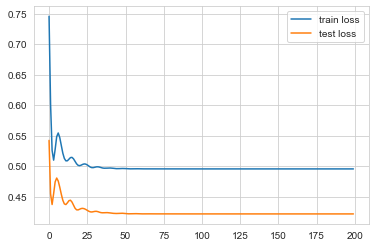

In [11]:
# Plot the train loss and test loss
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()

In [12]:
# 'Wrong' forecast using true targets
validation_target = Y[-N//2:]
with torch.no_grad():
    validation_predictions = model(X_test).numpy()

# index of first validation input
#i = 0

#while len(validation_predictions) < len(validation_target):
#    input_ = X_test[i].view(1, -1)
#    p = model(input_)[0,0].item() # 1x1 array => scalar
#    i += 1
    
    # update the predictions list
#    validation_predictions.append(p)

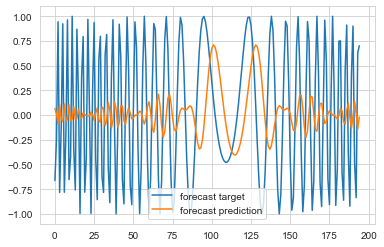

In [13]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [32]:
# Forecast future values
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
# 1-D array of length T
last_x = torch.from_numpy(X[-N//2:].astype(np.float32))


while len(validation_predictions) < len(validation_target):
    input_ = last_x[1:].view(194, 10)
    p = model(input_)
    
     # update the predictions list
    validation_predictions.append(p[0,0].item())
    
    # make the new input   
    last_x = torch.cat((last_x[1:].reshape(-1,1), p[0].reshape(1,1)))

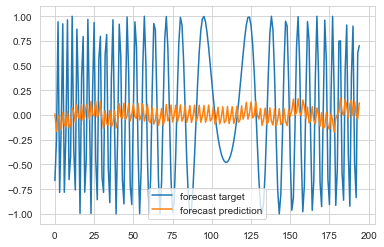

In [33]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()